#### FOUNDATIONS OF MACHINE LEARNING: SUPERVISED LEARNING

<br>

# Tennis Ace

<hr>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [64]:
tennis_stats = pd.read_csv('tennis_stats.csv')
tennis_stats.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [65]:
tennis_stats.corr()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


### Positive Correlations:

#### Wins to Losses

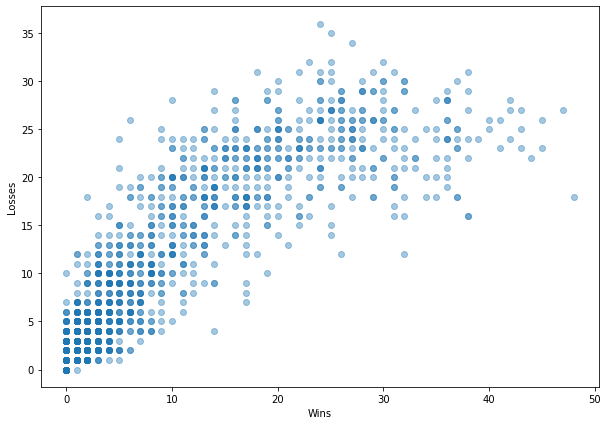

In [200]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

plt.scatter(tennis_stats['Wins'], tennis_stats['Losses'], alpha = 0.4)

plt.xlabel("Wins")
plt.ylabel("Losses")
plt.show()

In [187]:
wins = tennis_stats.loc[:, 'Wins']
losses = tennis_stats.loc[:, 'Losses']

In [191]:
win_train = np.array(win_train).reshape(-1, 1)
win_test = np.array(win_test).reshape(-1, 1)

win_loss_model = LinearRegression()
win_loss_model.fit(win_train, loss_train)

LinearRegression()

In [192]:
print(win_loss_model.score(win_test, loss_test))
print(win_loss_model.score(win_train, loss_train))

0.7632157112301483
0.7743457500937888


In [193]:
print(win_loss_model.intercept_)

3.1437663543827474


In [194]:
print(win_loss_model.coef_)

[0.77796067]


In [195]:
loss_predict = win_loss_model.predict(win_test)

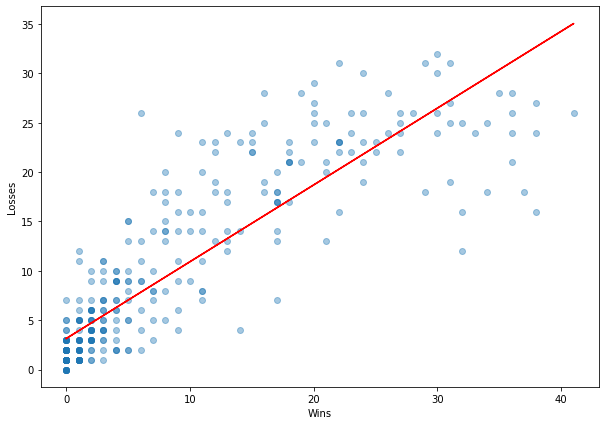

In [201]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

plt.scatter(win_test, loss_test, alpha = 0.4)
plt.plot(win_test, loss_predict, color = 'red')

plt.xlabel("Wins")
plt.ylabel("Losses")
plt.show()

#### Wins to Winnings (in USD)

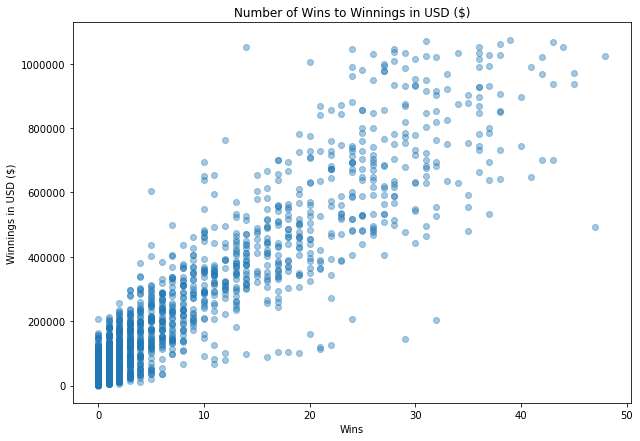

In [205]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

plt.scatter(tennis_stats['Wins'], tennis_stats['Winnings'], alpha = 0.4)

plt.title("Number of Wins to Winnings in USD ($)")
plt.xlabel("Wins")
plt.ylabel("Winnings in USD ($)")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show()

In [171]:
wins = tennis_stats.loc[:, 'Wins']
winnings = tennis_stats.loc[:, 'Winnings']

In [172]:
win_train, win_test, winning_train, winning_test = train_test_split(wins, winnings, train_size = 0.8, test_size = 0.2, random_state = 1)

In [173]:
win_train = np.array(win_train).reshape(-1, 1)
win_test = np.array(win_test).reshape(-1, 1)

win_winning_model = LinearRegression()
win_winning_model.fit(win_train, winning_train)

LinearRegression()

In [174]:
print(win_winning_model.score(win_test, winning_test))
print(win_winning_model.score(win_train, winning_train))

0.8041492305716499
0.841605302661558


In [176]:
print(win_winning_model.intercept_)

53657.63988662409


In [177]:
print(win_winning_model.coef_)

[22796.12866112]


In [178]:
winning_predict = win_winning_model.predict(win_test)

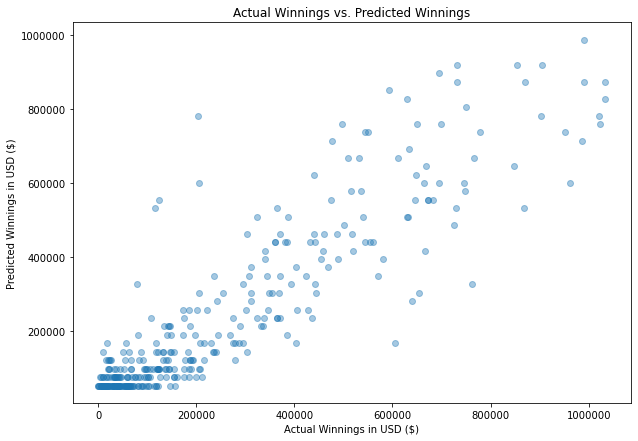

In [204]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
plt.scatter(winning_test, winning_predict, alpha = 0.4)

plt.title("Actual Winnings vs. Predicted Winnings")
plt.xlabel("Actual Winnings in USD ($)")
plt.ylabel("Predicted Winnings in USD ($)")
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show()

#### Wins & Losses to Winnings (in USD)

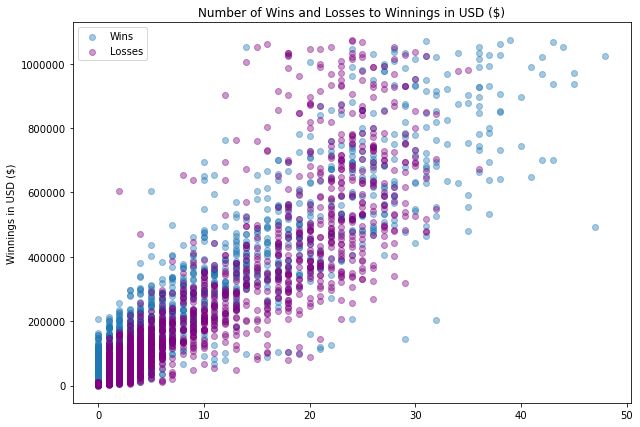

In [229]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

plt.scatter(tennis_stats['Wins'], tennis_stats['Winnings'], alpha = 0.4, label = 'Wins')
plt.scatter(tennis_stats['Losses'], tennis_stats['Winnings'], alpha = 0.4, color = 'purple', label = 'Losses')

plt.title("Number of Wins and Losses to Winnings in USD ($)")
plt.ylabel("Winnings in USD ($)")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

In [243]:
wins_losses = tennis_stats[['Wins', 'Losses']]
winnings = tennis_stats[['Winnings']]

In [262]:
winloss_train, winloss_test, winning_train, winning_test = train_test_split(wins_losses, winnings, train_size = 0.8, test_size = 0.2, random_state = 1)

In [263]:
print(winloss_train.shape)
print(winloss_test.shape)
print(winning_train.shape)
print(winning_test.shape)

(1376, 2)
(345, 2)
(1376, 1)
(345, 1)


In [264]:
print(len(winloss_train))
print(len(winloss_test))
print(len(winning_train))

1376
345
1376


In [265]:
win_loss_winning_model = LinearRegression()
win_loss_winning_model.fit(winloss_train, winning_train)

LinearRegression()

In [266]:
print(win_loss_winning_model.score(winloss_test, winning_test))
print(win_loss_winning_model.score(winloss_train, winning_train))

0.8220577227744996
0.8615980951106732


In [267]:
print(win_loss_winning_model.intercept_)

[27356.05501047]


In [268]:
print(win_loss_winning_model.coef_)

[[16287.50294905  8366.26578164]]


In [269]:
winning2_predict = win_loss_winning_model.predict(winloss_test)

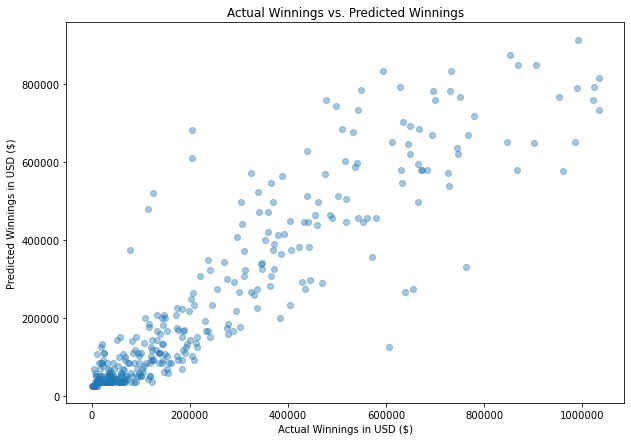

In [270]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
plt.scatter(winning_test, winning2_predict, alpha = 0.4)

plt.title("Actual Winnings vs. Predicted Winnings")
plt.xlabel("Actual Winnings in USD ($)")
plt.ylabel("Predicted Winnings in USD ($)")
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show()

#### FirstServePointsWon, SecondServePointsWon, and TotalServicePointsWon to Winnings in USD

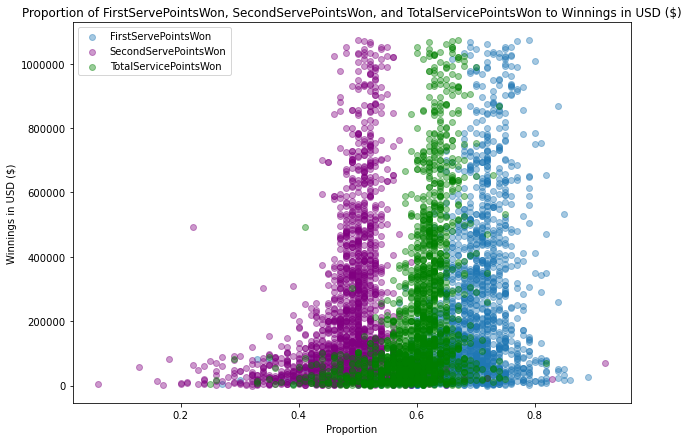

In [282]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)

plt.scatter(tennis_stats['FirstServePointsWon'], tennis_stats['Winnings'], alpha = 0.4, label = 'FirstServePointsWon')
plt.scatter(tennis_stats['SecondServePointsWon'], tennis_stats['Winnings'], alpha = 0.4, color = 'purple', label = 'SecondServePointsWon')
plt.scatter(tennis_stats['TotalServicePointsWon'], tennis_stats['Winnings'], alpha = 0.4, color = 'green', label = 'TotalServicePointsWon')

plt.title("Proportion of FirstServePointsWon, SecondServePointsWon, and TotalServicePointsWon to Winnings in USD ($)")
plt.xlabel("Proportion")
plt.ylabel("Winnings in USD ($)")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.legend()
plt.show()

In [287]:
features = tennis_stats[['FirstServePointsWon', 'SecondServePointsWon', 'TotalServicePointsWon']]
winnings = tennis_stats[['Winnings']]

In [288]:
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8, test_size = 0.2, random_state = 1)

In [289]:
model = LinearRegression()
model.fit(features_train, winnings_train)

LinearRegression()

In [291]:
print(model.intercept_)

[-819927.8087887]


In [292]:
print(model.coef_)

[[ 301544.44355467  113184.18020639 1320785.87350957]]


In [293]:
winning3_predict = model.predict(features_test)

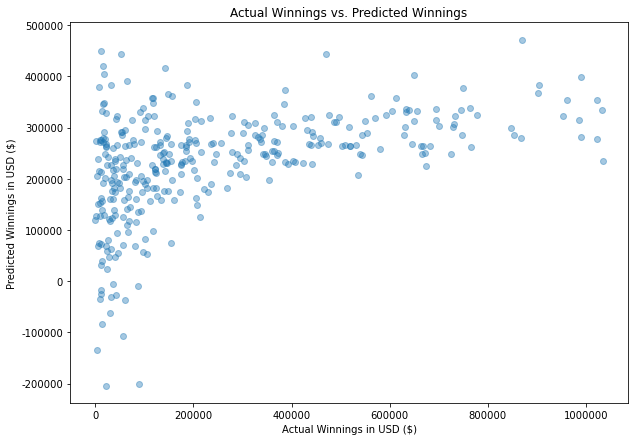

In [294]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
plt.scatter(winnings_test, winning3_predict, alpha = 0.4)

plt.title("Actual Winnings vs. Predicted Winnings")
plt.xlabel("Actual Winnings in USD ($)")
plt.ylabel("Predicted Winnings in USD ($)")
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.show()